In [78]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [79]:
data1=pd.read_csv("Downloads/order_details.csv")
data1

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1
48616,48617,21348,four_cheese_l,1
48617,48618,21348,napolitana_s,1
48618,48619,21349,mexicana_l,1


In [80]:
data2=pd.read_csv("Downloads/orders.csv")
data2

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30
...,...,...,...
21345,21346,2015-12-31,20:51:07
21346,21347,2015-12-31,21:14:37
21347,21348,2015-12-31,21:23:10
21348,21349,2015-12-31,22:09:54


In [81]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [82]:
data2["date"]=pd.to_datetime(data2["date"])

In [83]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  21350 non-null  int64         
 1   date      21350 non-null  datetime64[ns]
 2   time      21350 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 500.5+ KB


In [84]:
data3=pd.read_csv("Downloads/pizza_types2.csv")
data3

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."
5,thai_ckn,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha..."
6,big_meat,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau..."
7,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
8,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
9,ital_cpcllo,The Italian Capocollo Pizza,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,..."


In [85]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [86]:
data4=pd.read_csv("Downloads/pizzas.csv")
data4

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75
...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00
92,spinach_fet_l,spinach_fet,L,20.25
93,veggie_veg_s,veggie_veg,S,12.00
94,veggie_veg_m,veggie_veg,M,16.00


In [87]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [88]:
data4.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


## Used concat method to join the four data

In [89]:
data5=pd.concat([data1,data2,data3,data4],axis=1)
data5

,order_details_id,order_id,pizza_id,quantity,order_id,date,time,pizza_type_id,name,category,ingredients,pizza_id,pizza_type_id,size,price
0,1,1,hawaiian_m,1,1.0,2015-01-01,11:38:36,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,bbq_ckn,S,12.75
1,2,2,classic_dlx_m,1,2.0,2015-01-01,11:57:40,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",bbq_ckn_m,bbq_ckn,M,16.75
2,3,2,five_cheese_l,1,3.0,2015-01-01,12:12:28,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",bbq_ckn_l,bbq_ckn,L,20.75
3,4,2,ital_supr_l,1,4.0,2015-01-01,12:16:31,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli...",cali_ckn_s,cali_ckn,S,12.75
4,5,2,mexicana_m,1,5.0,2015-01-01,12:21:30,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja...",cali_ckn_m,cali_ckn,M,16.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48616,48617,21348,four_cheese_l,1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48617,48618,21348,napolitana_s,1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48618,48619,21349,mexicana_l,1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   order_id          21350 non-null  float64       
 5   date              21350 non-null  datetime64[ns]
 6   time              21350 non-null  object        
 7   pizza_type_id     32 non-null     object        
 8   name              32 non-null     object        
 9   category          32 non-null     object        
 10  ingredients       32 non-null     object        
 11  pizza_id          96 non-null     object        
 12  pizza_type_id     96 non-null     object        
 13  size              96 non-null     object        
 14  price             96 n

In [91]:
data5["date"].value_counts()

date
2015-11-27    115
2015-11-26    113
2015-10-15    107
2015-07-04    105
2015-05-15     94
             ... 
2015-03-22     37
2015-02-22     37
2015-12-27     35
2015-12-30     32
2015-12-29     27
Name: count, Length: 358, dtype: int64

In [92]:
data5.isna().sum()

order_details_id        0
order_id                0
pizza_id                0
quantity                0
order_id            27270
date                27270
time                27270
pizza_type_id       48588
name                48588
category            48588
ingredients         48588
pizza_id            48524
pizza_type_id       48524
size                48524
price               48524
dtype: int64

## Drop the Null Values in Date

In [93]:
data5= data5.dropna(subset=["date"])
data5.isna().sum()

order_details_id        0
order_id                0
pizza_id                0
quantity                0
order_id                0
date                    0
time                    0
pizza_type_id       21318
name                21318
category            21318
ingredients         21318
pizza_id            21254
pizza_type_id       21254
size                21254
price               21254
dtype: int64

In [94]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21350 entries, 0 to 21349
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  21350 non-null  int64         
 1   order_id          21350 non-null  int64         
 2   pizza_id          21350 non-null  object        
 3   quantity          21350 non-null  int64         
 4   order_id          21350 non-null  float64       
 5   date              21350 non-null  datetime64[ns]
 6   time              21350 non-null  object        
 7   pizza_type_id     32 non-null     object        
 8   name              32 non-null     object        
 9   category          32 non-null     object        
 10  ingredients       32 non-null     object        
 11  pizza_id          96 non-null     object        
 12  pizza_type_id     96 non-null     object        
 13  size              96 non-null     object        
 14  price             96 non-nu

## Drop the Duplicate columns

In [95]:
data5.duplicated().sum()

0

## Filling the Null Values with"Unknown"

In [96]:
data5["pizza_type_id"]=data5["pizza_type_id"].fillna("Unknown")
data5["name"]=data5["name"].fillna("Unknown")
data5["category"]=data5["category"].fillna("Unknown")
data5["ingredients"]=data5["ingredients"].fillna("Unknown")
data5["pizza_id"]=data5["pizza_id"].fillna("Unknown")
data5["pizza_type_id"]=data5["pizza_type_id"].fillna("Unknown")
data5["size"]=data5["size"].fillna("Unknown")

In [97]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21350 entries, 0 to 21349
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  21350 non-null  int64         
 1   order_id          21350 non-null  int64         
 2   pizza_id          21350 non-null  object        
 3   quantity          21350 non-null  int64         
 4   order_id          21350 non-null  float64       
 5   date              21350 non-null  datetime64[ns]
 6   time              21350 non-null  object        
 7   pizza_type_id     21350 non-null  object        
 8   name              21350 non-null  object        
 9   category          21350 non-null  object        
 10  ingredients       21350 non-null  object        
 11  pizza_id          21350 non-null  object        
 12  pizza_type_id     21350 non-null  object        
 13  size              21350 non-null  object        
 14  price             96 non-nu

## Fill the null values with the mean

In [98]:
data5["price"] = data5["price"].fillna(data5["price"].mean())

In [99]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21350 entries, 0 to 21349
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  21350 non-null  int64         
 1   order_id          21350 non-null  int64         
 2   pizza_id          21350 non-null  object        
 3   quantity          21350 non-null  int64         
 4   order_id          21350 non-null  float64       
 5   date              21350 non-null  datetime64[ns]
 6   time              21350 non-null  object        
 7   pizza_type_id     21350 non-null  object        
 8   name              21350 non-null  object        
 9   category          21350 non-null  object        
 10  ingredients       21350 non-null  object        
 11  pizza_id          21350 non-null  object        
 12  pizza_type_id     21350 non-null  object        
 13  size              21350 non-null  object        
 14  price             21350 non

In [100]:
data5.head(10)

,order_details_id,order_id,pizza_id,quantity,order_id,date,time,pizza_type_id,name,category,ingredients,pizza_id,pizza_type_id,size,price
0,1,1,hawaiian_m,1,1.0,2015-01-01,11:38:36,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,bbq_ckn,S,12.75
1,2,2,classic_dlx_m,1,2.0,2015-01-01,11:57:40,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",bbq_ckn_m,bbq_ckn,M,16.75
2,3,2,five_cheese_l,1,3.0,2015-01-01,12:12:28,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",bbq_ckn_l,bbq_ckn,L,20.75
3,4,2,ital_supr_l,1,4.0,2015-01-01,12:16:31,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli...",cali_ckn_s,cali_ckn,S,12.75
4,5,2,mexicana_m,1,5.0,2015-01-01,12:21:30,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja...",cali_ckn_m,cali_ckn,M,16.75
5,6,2,thai_ckn_l,1,6.0,2015-01-01,12:29:36,thai_ckn,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",cali_ckn_l,cali_ckn,L,20.75
6,7,3,ital_supr_m,1,7.0,2015-01-01,12:50:37,big_meat,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",ckn_alfredo_s,ckn_alfredo,S,12.75
7,8,3,prsc_argla_l,1,8.0,2015-01-01,12:51:37,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",ckn_alfredo_m,ckn_alfredo,M,16.75
8,9,4,ital_supr_m,1,9.0,2015-01-01,12:52:01,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",ckn_alfredo_l,ckn_alfredo,L,20.75
9,10,5,ital_supr_m,1,10.0,2015-01-01,13:00:15,ital_cpcllo,The Italian Capocollo Pizza,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,...",ckn_pesto_s,ckn_pesto,S,12.75


In [101]:
data5.sample(10)

,order_details_id,order_id,pizza_id,quantity,order_id,date,time,pizza_type_id,name,category,ingredients,pizza_id,pizza_type_id,size,price
5726,5727,2538,ital_cpcllo_m,1,5727.0,2015-04-06,19:05:51,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,16.440625
20990,20991,9207,prsc_argla_m,1,20991.0,2015-12-22,20:56:37,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,16.440625
15984,15985,7031,ital_supr_m,1,15985.0,2015-09-26,20:25:42,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,16.440625
9246,9247,4051,thai_ckn_l,1,9247.0,2015-06-04,18:32:46,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,16.440625
9285,9286,4068,big_meat_s,1,9286.0,2015-06-05,15:35:31,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,16.440625
8682,8683,3802,prsc_argla_l,1,8683.0,2015-05-25,21:01:40,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,16.440625
10713,10714,4693,napolitana_s,1,10714.0,2015-06-29,16:09:30,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,16.440625
4210,4211,1869,pepperoni_m,1,4211.0,2015-03-12,17:34:27,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,16.440625
18105,18106,7948,pep_msh_pep_s,1,18106.0,2015-11-05,13:03:43,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,16.440625
12136,12137,5330,cali_ckn_l,1,12137.0,2015-07-22,13:36:46,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,16.440625


## Total Revenue

In [102]:
total_revenue=(data5["quantity"]*data5["price"]).sum()
total_revenue

357678.2968750001

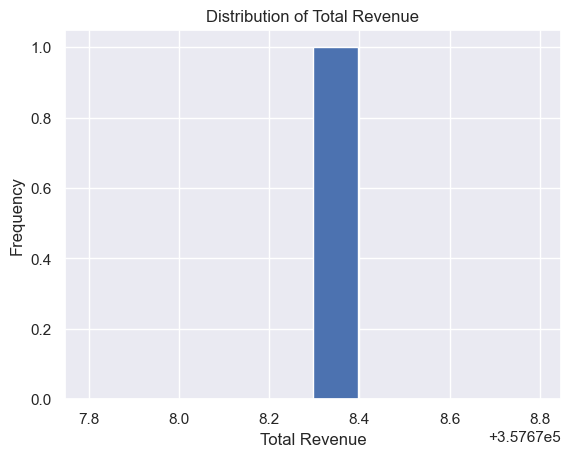

In [106]:
plt.hist(total_revenue,bins=10)
plt.title("Distribution of Total Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Frequency")
plt.show()

## Total Quantity

In [109]:
total_quantity=data5["quantity"].sum()
total_quantity

21756

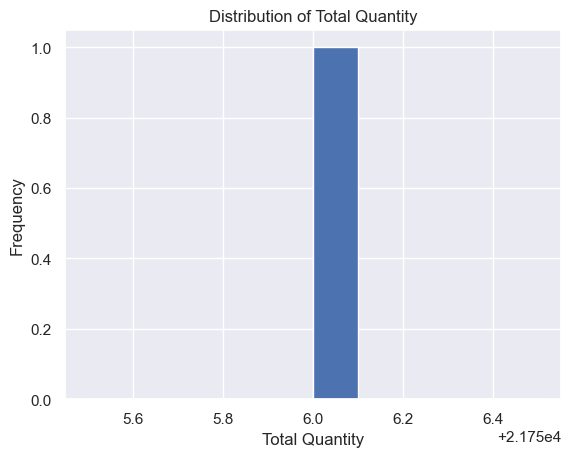

In [111]:
plt.hist(total_quantity,bins=10)
plt.title("Distribution of Total Quantity")
plt.xlabel("Total Quantity")
plt.ylabel("Frequency")
plt.show()

## Total Orders

In [112]:
total_order=data5["order_id"].sum()
total_order

order_id    100140618.0
order_id    227921925.0
dtype: float64

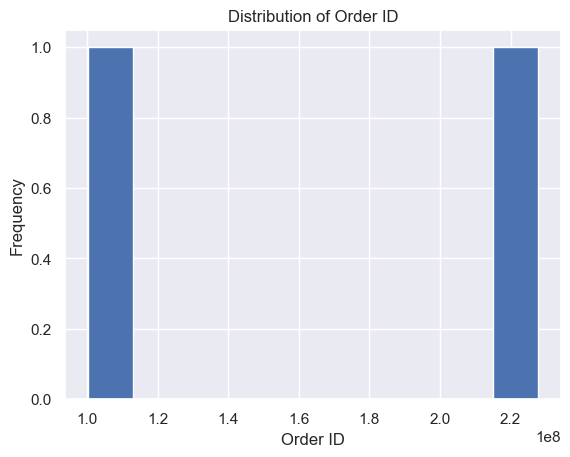

In [114]:
plt.hist(total_order,bins=10)
plt.title("Distribution of Order ID")
plt.xlabel("Order ID")
plt.ylabel("Frequency")
plt.show()

## Category of pizza type

In [115]:
no_pizza_type1=data5["category"].value_counts()
no_pizza_type1

category
Unknown    21318
Supreme        9
Veggie         9
Classic        8
Chicken        6
Name: count, dtype: int64

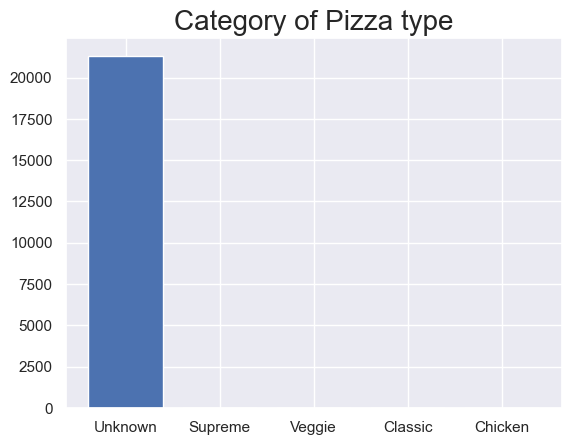

In [116]:
plt.bar(no_pizza_type1.index,no_pizza_type1.values)
plt.title("Category of Pizza type",fontsize=20)
plt.show()

## Number of Pizza Type

In [148]:
no_pizza_type=data5["name"].count()

no_pizza_type

21350

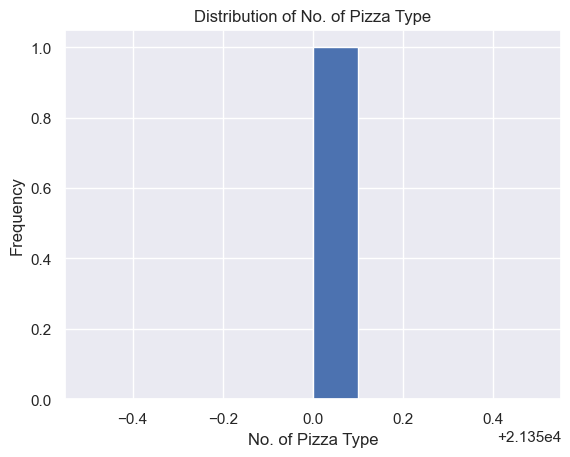

In [149]:
plt.hist(no_pizza_type,bins=10)
plt.title("Distribution of No. of Pizza Type")
plt.xlabel("No. of Pizza Type")
plt.ylabel("Frequency")
plt.show()

## Average Pizza price

In [118]:
average_price=data5["price"].mean()
average_price

16.440625000000004

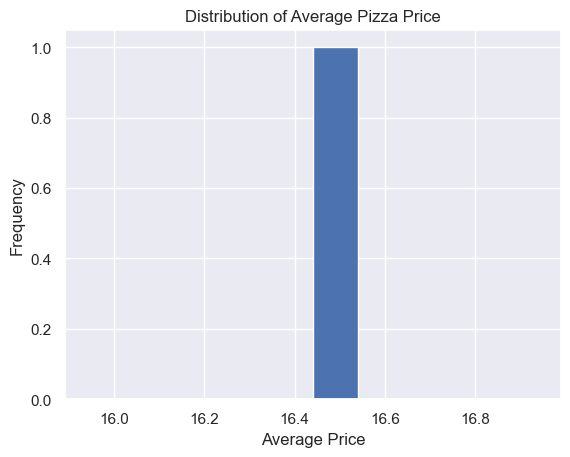

In [120]:
plt.hist(average_price,bins=10)
plt.title("Distribution of Average Pizza Price")
plt.xlabel("Average Price")
plt.ylabel("Frequency")
plt.show()

## Peak Hours of Sales

In [121]:
data5["Hour"]=pd.to_datetime(data5["time"],format="%H:%M:%S").dt.hour
peak_hours=data5.groupby("Hour")["price"].sum().reset_index()
peak_hours


,Hour,price
0,9,16.440625
1,10,131.525000
2,11,20227.515625
3,12,41431.584375
4,13,40359.006250
5,14,24194.193750
6,15,24136.490625
7,16,31551.915625
8,17,38435.125000
9,18,39437.034375


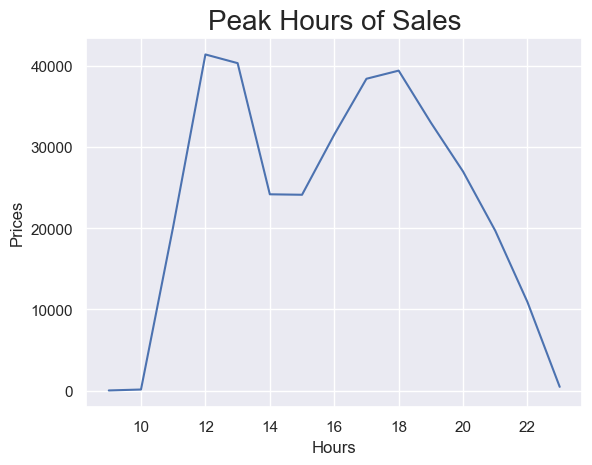

In [122]:
plt.plot(peak_hours["Hour"],peak_hours["price"])
plt.title("Peak Hours of Sales",fontsize=20)
plt.xlabel("Hours")
plt.ylabel("Prices")
plt.show()

## Total Sales Per Day

In [123]:
data5["Day"]=data5["date"].dt.day_name() #I extracted day from the date column
total_sales_day=data5.groupby("Day")["price"].sum().reset_index()
total_sales_day

,Day,price
0,Friday,58155.484375
1,Monday,45935.106250
2,Saturday,51919.493750
3,Sunday,43140.200000
4,Thursday,53262.631250
5,Tuesday,48877.978125
6,Wednesday,49716.450000


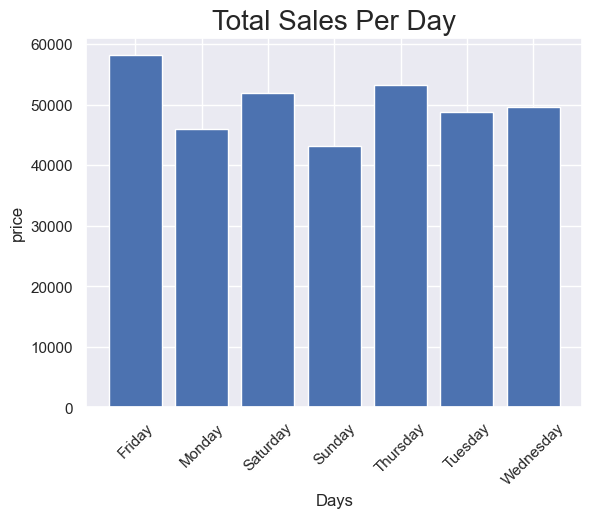

In [124]:
plt.bar(total_sales_day["Day"],total_sales_day["price"])
plt.xticks(rotation=45)
plt.title("Total Sales Per Day",fontsize=20)
plt.xlabel("Days")
plt.ylabel("price")
plt.show()

## Top 5 bestselling pizzas

In [140]:
Top_selling_pizza=data5.groupby("name")["quantity"].sum().nlargest(5).reset_index()
Top_selling_pizza

,name,quantity
0,Unknown,21724
1,The Barbecue Chicken Pizza,1
2,The Big Meat Pizza,1
3,The Brie Carre Pizza,1
4,The Calabrese Pizza,1


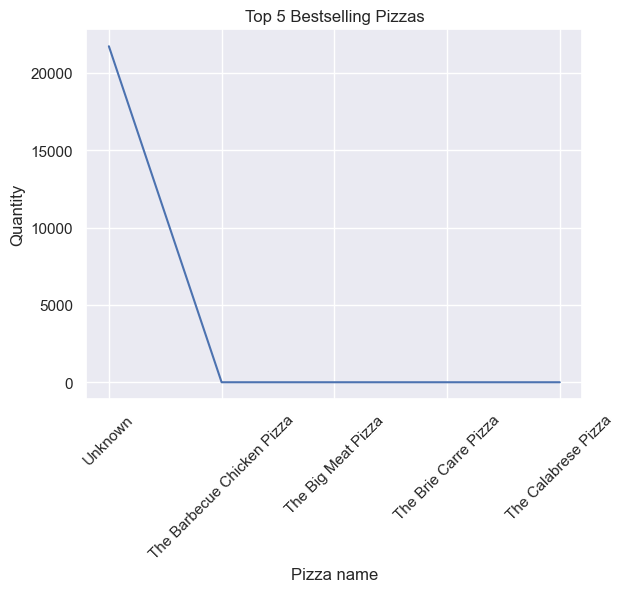

In [147]:
plt.plot(Top_selling_pizza["name"],Top_selling_pizza["quantity"])
plt.title("Top 5 Bestselling Pizzas")
plt.xticks(rotation=45)
plt.xlabel("Pizza name")
plt.ylabel("Quantity")
plt.show()

## Sales by the Month

In [126]:
data5["Month"]=data5["date"].dt.month_name() #I extracted month from the date column
data5["Month"]

0         January
1         January
2         January
3         January
4         January
           ...   
21345    December
21346    December
21347    December
21348    December
21349    December
Name: Month, Length: 21350, dtype: object

In [127]:
monthly_sales=data5.groupby("Month")["price"].sum().reset_index().sort_values(by="Month")
monthly_sales

,Month,price
0,April,29576.684375
1,August,30267.190625
2,December,27620.250000
3,February,27702.453125
4,January,30332.953125
5,July,31812.609375
6,June,29149.228125
7,March,30250.750000
8,May,30464.478125
9,November,29461.600000


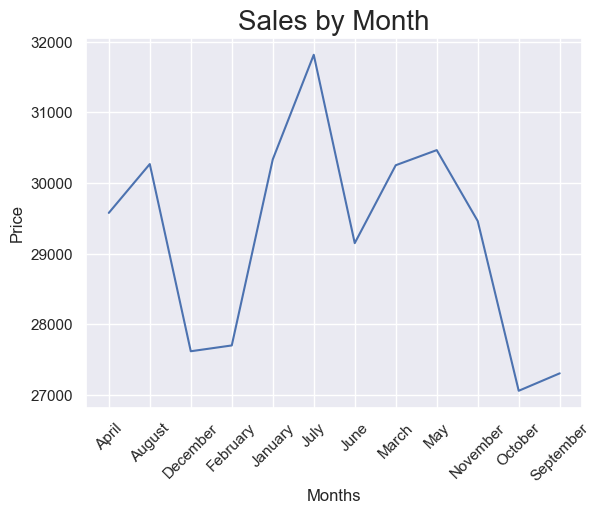

In [129]:
plt.plot(monthly_sales["Month"],monthly_sales["price"])
plt.title("Sales by Month",fontsize=20)
plt.xlabel("Months")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

In [135]:
least_selling_pizzas=data5.groupby("name")["quantity"].sum().nsmallest(10).reset_index()
least_selling_pizzas

,name,quantity
0,The Barbecue Chicken Pizza,1
1,The Big Meat Pizza,1
2,The Brie Carre Pizza,1
3,The Calabrese Pizza,1
4,The California Chicken Pizza,1
5,The Chicken Alfredo Pizza,1
6,The Chicken Pesto Pizza,1
7,The Classic Deluxe Pizza,1
8,The Five Cheese Pizza,1
9,The Four Cheese Pizza,1


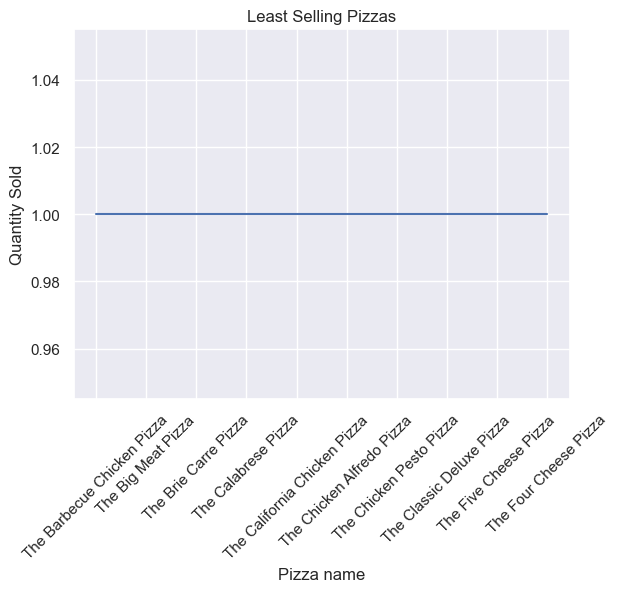

In [138]:
plt.plot(least_selling_pizzas["name"],least_selling_pizzas["quantity"])
plt.title("Least Selling Pizzas")
plt.xticks(rotation=45)
plt.xlabel("Pizza name")
plt.ylabel("Quantity Sold")
plt.show()
